In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("GEO557Tropical_Storm_Dataset_CLEAN.csv") 
# import, get info and head to prove data exists. 
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      2240 non-null   int64  
 1   Name      2240 non-null   object 
 2   BASIN     0 non-null      float64
 3   ISO_TIME  2240 non-null   object 
 4   NATURE    2240 non-null   object 
 5   LAT       2240 non-null   float64
 6   LON       2240 non-null   float64
 7   WMO WIND  1180 non-null   float64
 8   WMO PRES  1180 non-null   float64
 9   USA WIND  2240 non-null   int64  
 10  USA PRES  2240 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 192.6+ KB
None


,Year,Name,BASIN,ISO_TIME,NATURE,LAT,LON,WMO WIND,WMO PRES,USA WIND,USA PRES
0,2023,IDALIA,NaN,2023-08-26 12:00:00,TS,20.8,-86.1,25.0,1006.0,25,1006
1,2023,IDALIA,NaN,2023-08-26 15:00:00,TS,21.1,-86.1,NaN,NaN,25,1006
2,2023,IDALIA,NaN,2023-08-26 18:00:00,TS,21.3,-86.2,25.0,1006.0,25,1006
3,2023,IDALIA,NaN,2023-08-26 21:00:00,TS,21.3,-86.3,NaN,NaN,28,1005
4,2023,IDALIA,NaN,2023-08-27 00:00:00,TS,21.1,-86.4,30.0,1004.0,30,1004
5,2023,IDALIA,NaN,2023-08-27 03:00:00,TS,20.8,-86.7,NaN,NaN,30,1003
6,2023,IDALIA,NaN,2023-08-27 06:00:00,TS,20.5,-86.8,30.0,1002.0,30,1002
7,2023,IDALIA,NaN,2023-08-27 09:00:00,TS,20.2,-86.6,NaN,NaN,33,1001
8,2023,IDALIA,NaN,2023-08-27 12:00:00,TS,19.9,-86.3,35.0,999.0,35,999
9,2023,IDALIA,NaN,2023-08-27 15:00:00,TS,19.9,-86.0,NaN,NaN,38,998


In [6]:
import folium

# Function to determine the color based on wind speed
def get_color(wind_speed):
    if wind_speed < 50:
        return 'green'   
    elif 50 <= wind_speed < 70:
        return 'yellow'  
    elif 70 <= wind_speed < 90:
        return 'orange'  
    else:
        return 'red'     

# Filter the DataFrame to include only the hurricane data with wind >= 40 mph
hurricane_path = df[df['USA WIND'] >= 40].dropna(subset=['LAT', 'LON'])

# Create a map centered around Florida with OpenStreetMap tiles
m = folium.Map(
    location=[hurricane_path['LAT'].mean(), hurricane_path['LON'].mean()],
    tiles='OpenStreetMap',
    zoom_start=6
)

# Group by 'Name' to connect points of the same hurricane
for name, group in hurricane_path.groupby('Name'):
    previous_location = None
    previous_color = None

    # Add markers for each point in the group
    for _, row in group.iterrows():
        location = [row['LAT'], row['LON']]
        popup = f"{row['Name']}<br>Wind: {row['USA WIND']} mph<br>Pressure: {row['USA PRES']} hPa"
        
        # Get the color based on the wind speed
        color = get_color(row['USA WIND'])

        # Add a circle marker for each data point
        folium.CircleMarker(
            location=location,
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=popup
        ).add_to(m)

        # Draw a polyline from the previous point to the current point, if a previous point exists
        if previous_location is not None:
            folium.PolyLine(
                locations=[previous_location, location],
                color=previous_color,  # Set line color to previous point's color
                weight=2,
                dash_array='5, 5'  # Dashed line effect
            ).add_to(m)

        # Update the previous point information
        previous_location = location
        previous_color = color

# Display the map
m

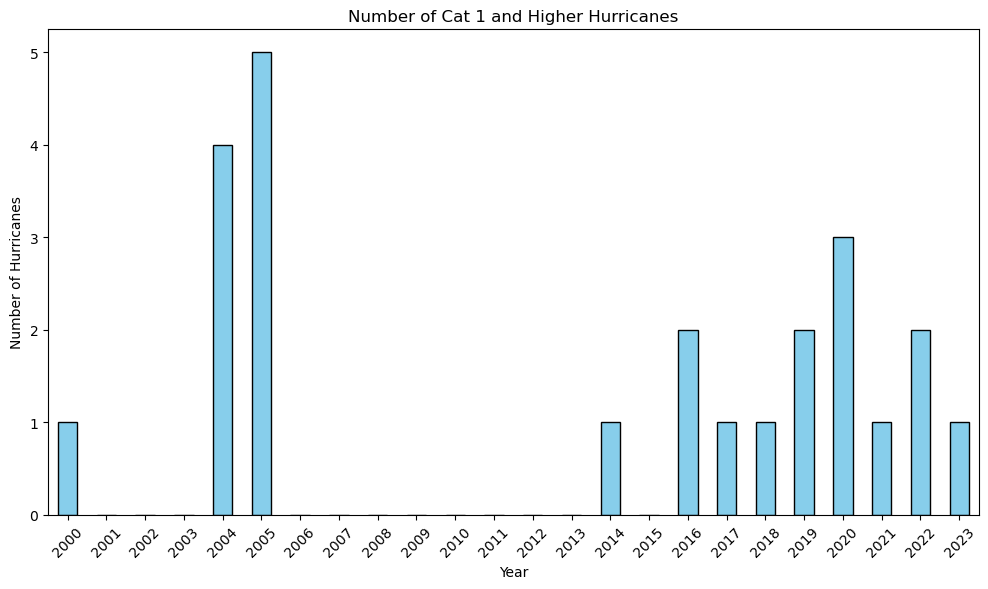

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Group
storm_counts = df.groupby('Year')['Name'].nunique()

# Create a range of years 
all_years = pd.Series(range(df['Year'].min(), df['Year'].max() + 1), name='Year')

# fill in missing years with 0
storm_counts = storm_counts.reindex(all_years, fill_value=0)

# Plot the data
plt.figure(figsize=(10, 6))
storm_counts.plot(kind='bar', color='skyblue', edgecolor='black')
# label stuff 
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.title('Number of Cat 1 and Higher Hurricanes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

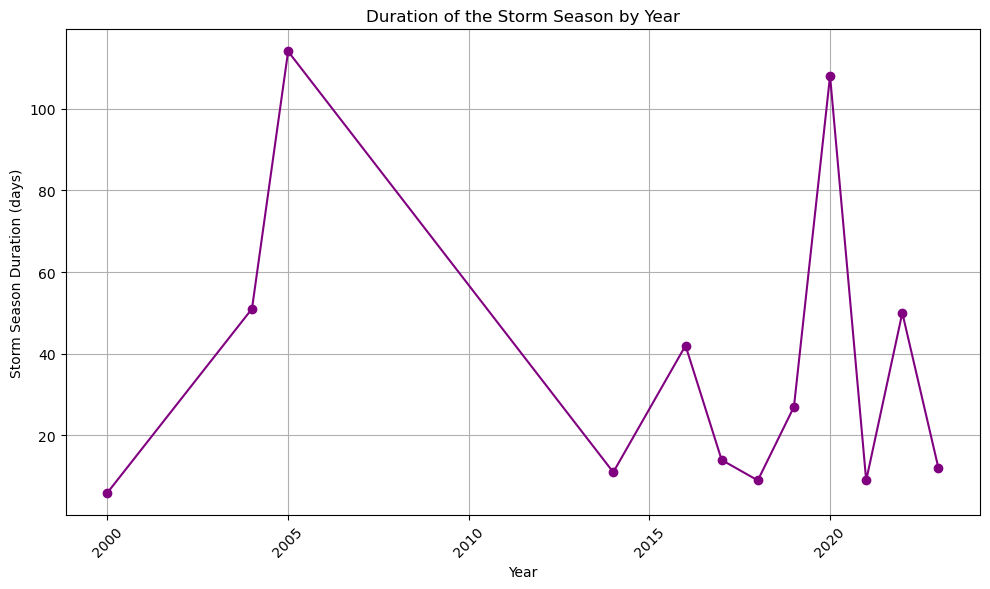

In [10]:
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'])

# Group by year
season_durations = df.groupby('Year')['ISO_TIME'].agg(['min', 'max'])
season_durations['Duration'] = (season_durations['max'] - season_durations['min']).dt.days

# Plot the duration of the storm season for each year
plt.figure(figsize=(10, 6))
plt.plot(season_durations.index, season_durations['Duration'], marker='o', color='purple', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Storm Season Duration (days)')
plt.title('Duration of the Storm Season by Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()